*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-030201Line/'
FileBaseName = '1Error-030201Line'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-030201Line/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-030201Line/


最確値を書式化して文字列として返す関数
```
Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
```
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

In [5]:
############################################
def GrfLine( Xdata, Ysets, x_mean, y_mean, title=r'$y=ax+b$' ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(9,8) )
  #
  fig.subplots_adjust(left=0.16, right=0.97, top=0.92, bottom=0.11)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( r'$x$' )
  ax1.set_ylabel( r'$y$' )
  #
  for Yset in Ysets:
    #
    Ydata  = Yset[0]
    Ylabel = Yset[1]
    Ymode  = Yset[2]
    Ycolor = Yset[3]
    #
    if Ymode == 1:
      # plot / solid line
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='solid', label=Ylabel )
    elif  Ymode == 2:
      # plot / dashed
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dashed', label=Ylabel )
    elif  Ymode == 3:
      # plot / dotted
      ax1.plot( Xdata, Ydata, color=Ycolor, linewidth=2.0, linestyle='dotted', label=Ylabel )
    else:
      # scatter
      ax1.scatter( Xdata, Ydata, color=Ycolor, s=20.0, label=Ylabel )
    #
  #
  # x_mean
  ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}, \overline{y}$' )
  # ax1.axvline( x_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{x}$' )
  #
  # y_mean
  ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted' )
  # ax1.axhline( y_mean, 0, 1.0, color='black', linestyle='dotted', label=r'$\overline{y}$' )
  #
  plt.title( title,fontsize=24 )
  # plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  plt.legend( fontsize=18, loc='upper left', borderaxespad=0 )
  #
  plt.show()
  #
  return fig

1.3.2 最小二乗法による線形回帰

(1) 各測定値の誤差が等しい場合の直線回帰

まず、$y=a\,x+b$のデータを用意する。
* 傾きの真値: $a_{\rm{}true}=1.5$
* 切片の真値: $b_{\rm{}true}=-0.5$
* データ点数: $n=20$
* $x$の範囲: $x=0.0\sim2.0$
* $y$値に重畳する正規分布ノイズ: ${\cal{}N}(0,\sigma=0.25)$

$x$と$y$の平均値
$$
\overline{x}=\frac{1}{M}\sum^{M} x_{m},
\;\;\;\;\;\;
\overline{y}=\frac{1}{M}\sum^{M} y_{m},
$$

In [6]:
############################################
# データ点数
n = 20
#
# x軸
x_data = np.linspace(0.0,2.0, num=n, endpoint=True )
#
############################################
# 真値: 傾き a
a_true = 1.5
a_true_str = r'$a_{\rm{}true}=%+.2f$' % a_true
#
# 真値: 切片
b_true = -0.5
b_true_str = r'$b_{\rm{}true}=%+.2f$' % b_true
#
# 真値直線
y_true = a_true * x_data + b_true
#
############################################
# y値ノイズの標準偏差
sigma = 0.25
sigma_str = r'$\sigma=%+.3f$' % sigma
#
# 乱数seed
np.random.seed( 46 )
# y値ノイズ
y_noise = np.random.normal( loc=0, scale=sigma, size=n )
#
# y値ノイズの実際の標準偏差
y_noise_std = np.std( y_noise )
y_noise_std_str = r'$\sigma=%+.3f$' % y_noise_std
#
############################################
# ノイズの重畳した yデータ
y_data = y_true + y_noise
#
############################################
# xの平均値、yの平均値
x_data_mean = np.mean( x_data )
y_data_mean = np.mean( y_data )


準備したデータのグラフ

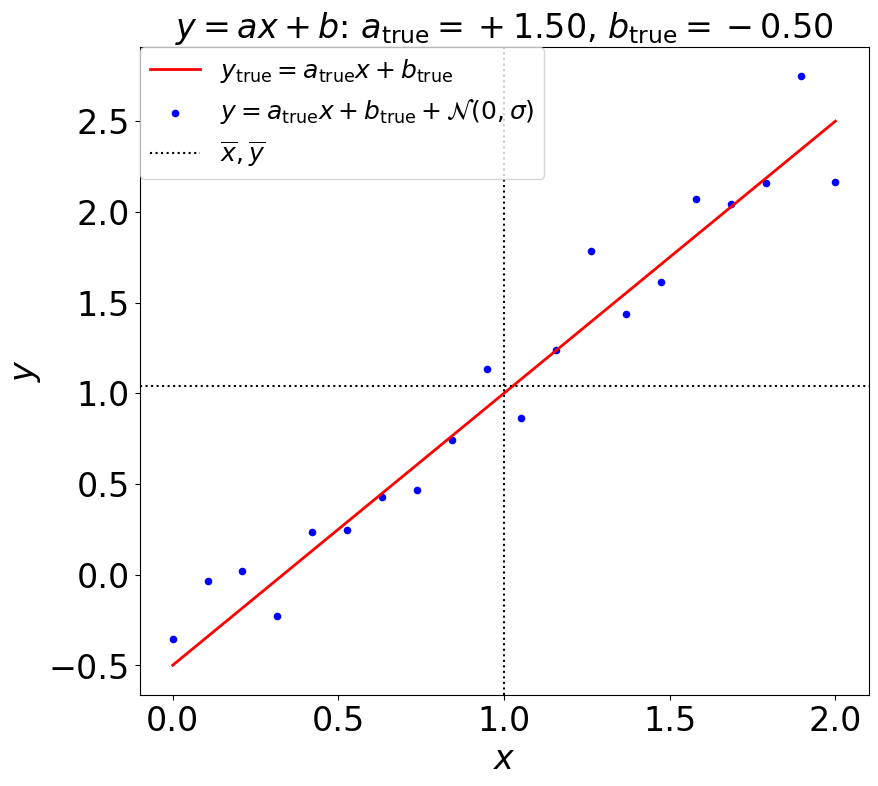

In [7]:
############################################
Ysets = [ [y_true, r'$y_{\rm{}true}=a_{\rm{}true}x+b_{\rm{}true}$',          1, 'red' ],
          [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$', 0, 'blue'] ]
#
fig = GrfLine( x_data, Ysets, x_data_mean, y_data_mean, title=r'$y=ax+b$: ' + a_true_str + ', ' + b_true_str )
#
fig.savefig( FilePath + FileBaseName + '-01.pdf' )

傾き$a$と、切片$b$の推定-1
$$
{\rm dxs} = x_{m}-\overline{x},
\;\;\;
{\rm dxs2} = (x_{m}-\overline{x})^{2},
\;\;\;
{\rm dxs2sum} = \sum^{M}(x_{m}-\overline{x})^{2}.
$$

$$
{\rm dxy} = (x_{m}-\overline{x})y_{m},
\;\;\;
{\rm dxysum} = \sum^{M}(x_{m}-\overline{x})y_{m}.
$$

In [8]:
############################################
dxs     = x_data - x_data_mean
dxs2    = dxs**2
dxs2sum = np.sum(dxs2)
#
dys  = y_data - y_data_mean
#
dxy = dxs * y_data
dxysum = np.sum( dxy )
#

【傾き$a$と、切片$b$の推定値】

* 傾き$a$の推定値
  $$
  a=\frac{
    \displaystyle
    \sum^{M}(x_{m}-\overline{x})y_{m}
  }{
    \displaystyle
    \sum^{M}(x_{m}-\overline{x})^{2}
  }
  $$
* 傾き$b$の推定値
  $$
  b=\overline{y}-a\,\overline{x}
  $$
* 推定値を用いた直線
  $$
  y_{m}=a\,x_{m} + b
  $$

In [9]:
############################################
# aの推定値
a_mlsq = dxysum / dxs2sum
#
# bの推定値
b_mlsq = y_data_mean - a_mlsq * x_data_mean
#
# 推定値を用いた直線
y_mlsq = a_mlsq * x_data + b_mlsq

【傾き$a$の誤差】、【切片$b$の誤差】

測定値$y_i$と推定値$a x_{i}+b$との残差
$$
{\rm{}deltas} = \delta_{m} = y_{m} - (a\,x_{m}+b)
$$

$$
{\rm{}deltas2} = \delta_{m}^2 = [y_{m} - (a\,x_{m}+b)]^{2}
$$

$$
{\rm{}deltas2sum} = \sum^{M} [y_{m} - (a\,x_{m}+b)]^{2}
$$

$y$値の標準偏差
$$
{\rm{}sigma\_y}
= \sigma_{y}
= \sqrt{
    \frac{
      \displaystyle
      \sum^{M} [y_{m} - (a\,x_{m}+b)]^{2}
    }{
      \displaystyle{}M-1
    }
  }
$$

傾き$a$の誤差
$$
{\rm{}sigma\_a}
= \sigma_{a}
= \frac{
    \displaystyle
    1
  }{
    \displaystyle
    \sqrt{
      \sum^{M}(x_{m}-\overline{x})^{2}
    }
  }
  \times
  \sigma_{y}
$$

切片$b$の誤差
$$
{\rm{}sigma\_b} = \sigma_{b}=
\sqrt{
  \frac{
    \displaystyle
    \overline{x^{2}}
  }{
    \displaystyle
    \sum^{M}(x_{m}-\overline{x})^{2}
  }
}
\times
\sigma_{y}
$$

$a$, $b$の最確値
$$
  a\pm\sigma_{a},
  \;\;\;\;
  b\pm\sigma_{b},
$$

In [10]:
############################################
# y_{i} - (a x_{i} + b)
deltas  = y_data - y_mlsq
deltas2 = deltas**2
deltas2sum = np.sum( deltas2 )
#
# yの測定値の標準偏差
sigma_y = np.sqrt( deltas2sum / (n-1) )
#
# aの推定値の標準偏差
sigma_a = sigma_y / np.sqrt( dxs2sum )
#
# bの推定値の標準偏差
x2      = x_data**2
x2_sum  = np.sum( x2 )
sigma_b = np.sqrt( x2_sum / (n * dxs2sum) ) * sigma_y
#
a_mlsq_str = Format_MostProbableValue( a_mlsq, sigma_a, '', std_2digits=True, latex=True )
b_mlsq_str = Format_MostProbableValue( b_mlsq, sigma_b, '', std_2digits=True, latex=True )

C:\Users\iakai\AppData\Local\Temp\ipykernel_34452\2487594177.py:4: RuntimeWarning: invalid value encountered in log10
  order_mean = np.floor( np.log10(v_mean) )


直線回帰の結果をグラフで描画

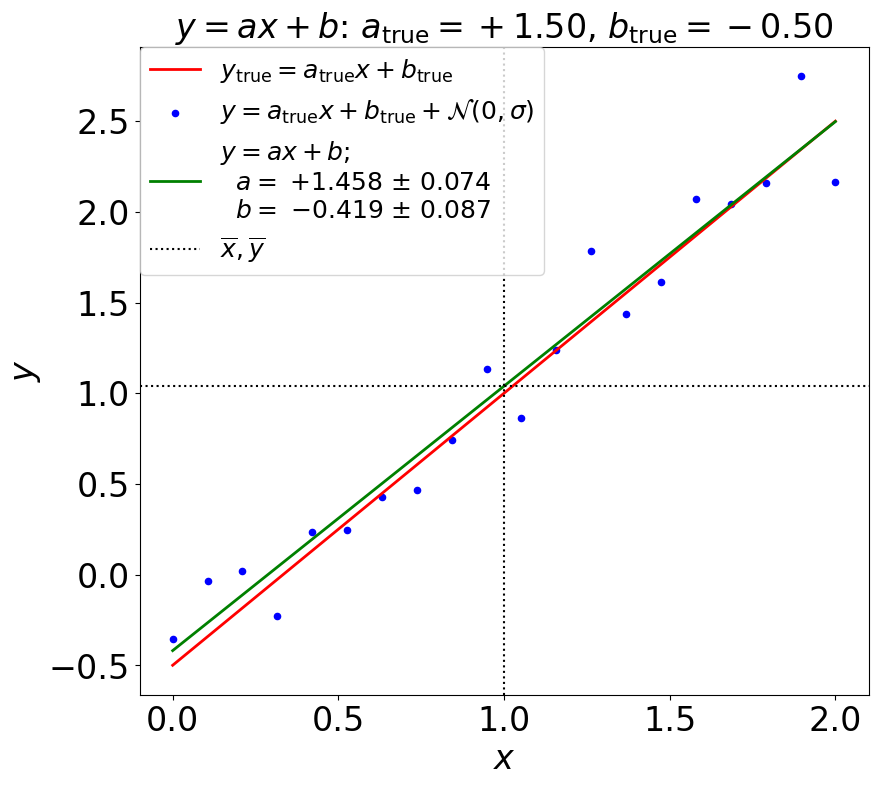

In [11]:
############################################
Ysets = [ [y_true, r'$y_{\rm{}true}=a_{\rm{}true}x+b_{\rm{}true}$',                                1, 'red'  ],
          [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',                       0, 'blue' ],
          [y_mlsq, r'$y=ax+b$; ' + '\n  ' + r'$a=$ ' + a_mlsq_str + '\n  ' + r'$b=$ '+b_mlsq_str , 1, 'green'] ]
#
fig = GrfLine( x_data, Ysets, x_data_mean, y_data_mean, title=r'$y=ax+b$: ' + a_true_str + ', ' + b_true_str )
#
fig.savefig( FilePath + FileBaseName + '-02.pdf' )

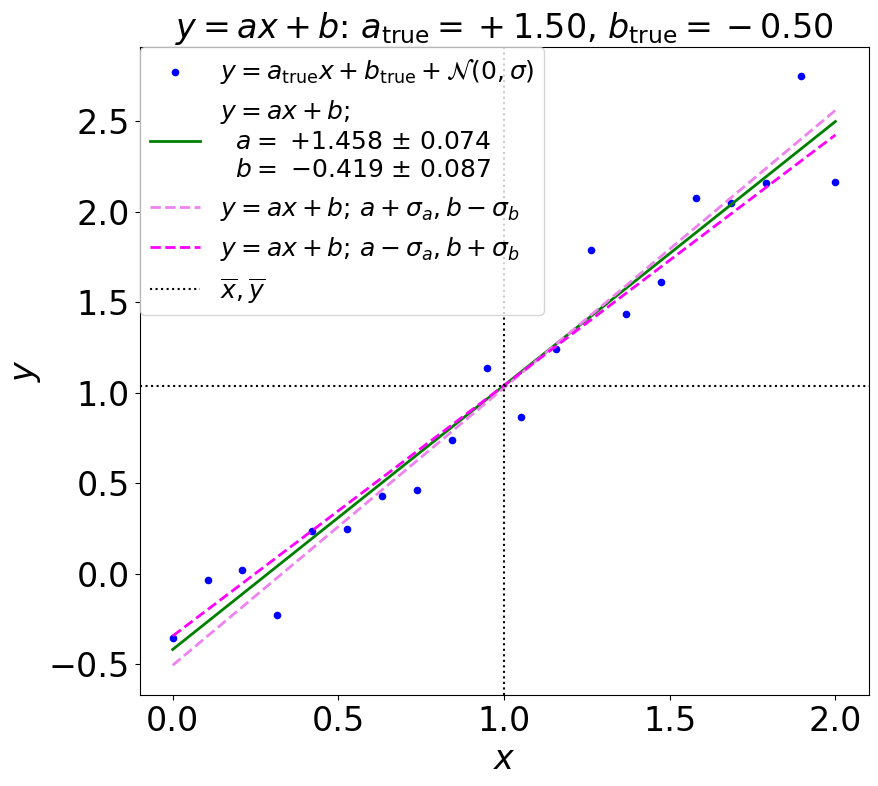

In [12]:
############################################
a_mlsq1 = a_mlsq + sigma_a
b_mlsq1 = b_mlsq - sigma_b
y_mlsq1 = a_mlsq1 * x_data + b_mlsq1
#
a_mlsq2 = a_mlsq - sigma_a
b_mlsq2 = b_mlsq + sigma_a
y_mlsq2 = a_mlsq2 * x_data + b_mlsq2
#
Ysets = [ [y_data, r'$y=a_{\rm{}true}x+b_{\rm{}true}+{\cal{}N}(0,\sigma)$',                       0, 'blue' ],
          [y_mlsq, r'$y=ax+b$; ' + '\n  ' + r'$a=$ ' + a_mlsq_str + '\n  ' + r'$b=$ '+b_mlsq_str , 1, 'green'],
          [y_mlsq1, r'$y=ax+b$; $a+\sigma_{a}, b-\sigma_{b}$',                      2, 'violet'],
          [y_mlsq2, r'$y=ax+b$; $a-\sigma_{a}, b+\sigma_{b}$',                      2, 'magenta']
          ]
#
fig = GrfLine( x_data, Ysets, x_data_mean, y_data_mean, title=r'$y=ax+b$: ' + a_true_str + ', ' + b_true_str )
#
fig.savefig( FilePath + FileBaseName + '-03.pdf' )